In [1]:
import sys
sys.path.append('..')

In [2]:
from workspace import nometools as nome

In [3]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
main_path = '/home/kevin/DNA-Methylation-patterns/'
data_path = main_path + 'downstream/'

#### Promoter annotation and sorting

In [ ]:
## Getting promoters from refGene

infile = data_path + 'refGene'
outfile = data_path + 'refGene.promoters.bed'
# nome.get_promoters_refGene(infile, outfile)

In [ ]:
outfile = data_path + 'refGene.promoters.bed'
print('no of promoters :', nome.get_num_reads(outfile))

In [ ]:
## sorting bed files promoter

infile = data_path + 'refGene.promoters.bed'
outfile = data_path + 'refGene.promoters.sorted.bed'

# nome.sort_bed(infile, outfile)

#### GCH filtering and intersection

In [5]:
## Filtering GCH file
## Filtering for reads with coverage >= 3

infile = data_path + 'cpg.raw.sort.GCH.bed'
outfile = data_path + 'GCH.filtered.bed'

# nome.filter_bed_files(infile, outfile)

In [6]:
infile = data_path + 'cpg.raw.sort.GCH.bed'
outfile = data_path + 'GCH.filtered.bed'
ni = nome.get_num_reads(infile)
no = nome.get_num_reads(outfile)
print('no of reads in GCH file :', ni)
print('no of reads in filtered GCH file :', no)
print('percentage of reads remaining {}%'.format(round(no*100/ni, 2)))

no of reads in GCH file : 193067497
no of reads in filtered GCH file : 102539428
percentage of reads remaining 53.11%


In [7]:
## sorting bed files GCH

infile = data_path + 'GCH.filtered.bed'
outfile = data_path + 'GCH.filtered.sorted.bed'

# nome.sort_bed(infile, outfile)

In [ ]:
## GCH intersect with promoter

promoters_sorted = data_path + 'refGene.promoters.sorted.bed'
gch_sorted = data_path + 'GCH.filtered.sorted.bed'
outfile = data_path + 'GCH.promoter.intersect.bed'

# nome.intersect_bed(promoters_sorted, gch_sorted, outfile)

In [8]:
outfile = data_path + 'GCH.promoter.intersect.bed'
print('no of reads in promoter region :', nome.get_num_reads(outfile))

no of reads in promoter region : 2903756


In [13]:
infile = data_path + 'GCH.promoter.intersect.bed'
_, df = nome.get_promoter_methylation(infile)

In [14]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,meth_start_genome,meth_end_genome,meth_pos_promo_abs,meth_pos_promo_rel,meth_rate,coverage
0,NM_001005277-621034,NM_001005277,OR4F16,chr1,621034,624034,621095,622034,-,622849,622850,1184,-816,33.33,3
1,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857344,857345,42,-1958,66.67,3
2,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857350,857351,48,-1952,20.00,5
3,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857351,857352,49,-1951,66.67,3
4,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857391,857392,89,-1911,50.00,4


In [15]:
df.shape

(2894593, 15)

In [16]:
print('no of promoters : ', df['trans_id'].unique().shape)

no of promoters :  (31783,)


In [17]:
# df_filtered = df[df['chrom'] == 'chr1']
df_filtered = df.copy()

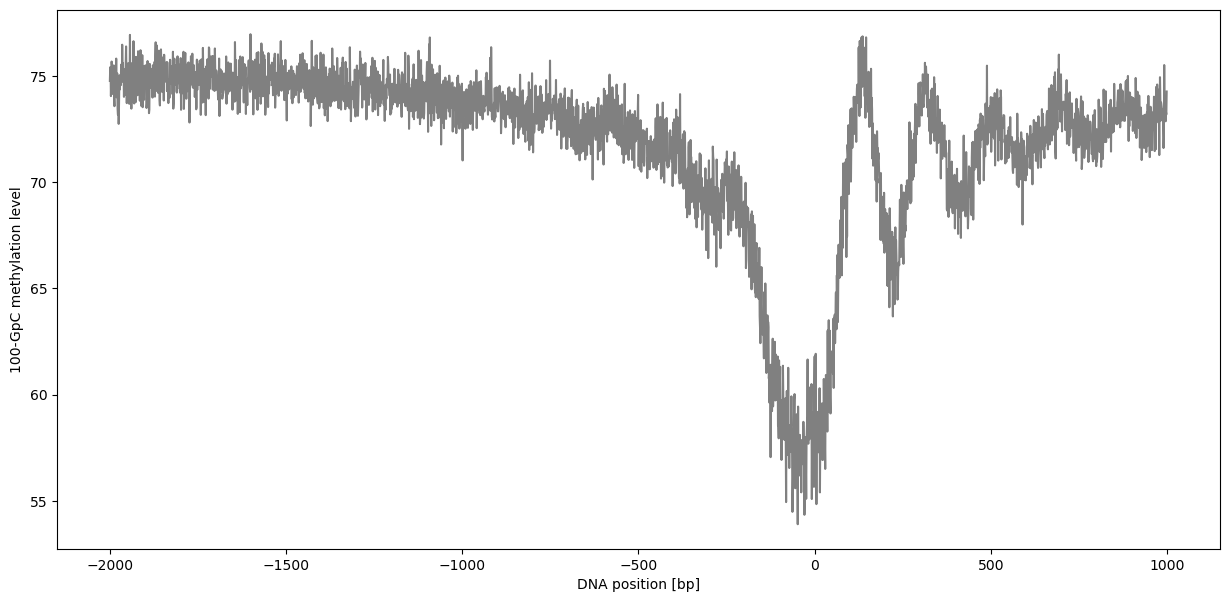

In [18]:
nome.plot_avg_methylation_levels(df_filtered, 'GCH')

#### HCG filtering and intersection

In [15]:
## Filtering HCG file
## Filtering for reads with coverage >= 3

infile = data_path + 'cpg.raw.sort.HCG.bed'
outfile = data_path + 'HCG.filtered.bed'

# nome.filter_bed_files(infile, outfile)

start traversing bed file  /home/kevin/DNA-Methylation-patterns/downstream/cpg.raw.sort.HCG.bed n =  32179579
progress : 10.0% and time elapsed 0.24 min
progress : 20.0% and time elapsed 0.49 min
progress : 30.0% and time elapsed 0.74 min
progress : 40.0% and time elapsed 1.0 min
progress : 50.0% and time elapsed 1.24 min
progress : 60.0% and time elapsed 1.49 min
progress : 70.0% and time elapsed 1.73 min
progress : 80.0% and time elapsed 1.99 min
progress : 90.0% and time elapsed 2.24 min
progress : 100.0% and time elapsed 2.49 min
filered bed file with min coverage 3 and saved to /home/kevin/DNA-Methylation-patterns/downstream/HCG.filtered.bed
Non standard chrs seen :  {'chrGL000216.1', 'chrGL000226.1', 'chrGL000249.1', 'chrGL000227.1', 'chrGL000207.1', 'chrGL000240.1', 'chrGL000235.1', 'chrGL000192.1', 'chrGL000220.1', 'chrGL000195.1', 'chrGL000205.1', 'chrGL000241.1', 'chrGL000228.1', 'chrGL000208.1', 'chrGL000238.1', 'chrGL000203.1', 'chrGL000218.1', 'chrGL000219.1', 'chrGL000214

In [16]:
infile = data_path + 'cpg.raw.sort.HCG.bed'
outfile = data_path + 'HCG.filtered.bed'
ni = nome.get_num_reads(infile)
no = nome.get_num_reads(outfile)
print('no of reads in HCG file :', ni)
print('no of reads in filtered HCG file :', no)
print('percentage of reads remaining {}%'.format(round(no*100/ni, 2)))

no of reads in HCG file : 32179579
no of reads in filtered HCG file : 15302833
percentage of reads remaining 47.55%


In [17]:
## sorting bed files HCG

infile = data_path + 'HCG.filtered.bed'
outfile = data_path + 'HCG.filtered.sorted.bed'

# nome.sort_bed(infile, outfile)

In [18]:
## HCG intersect with promoter

promoters_sorted = data_path + 'refGene.promoters.sorted.bed'
hcg_sorted = data_path + 'HCG.filtered.sorted.bed'
outfile = data_path + 'HCG.promoter.intersect.bed'

# nome.intersect_bed(promoters_sorted, hcg_sorted, outfile)

In [5]:
infile = data_path + 'HCG.promoter.intersect.bed'
_, df = nome.get_promoter_methylation(infile)

In [6]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,meth_start_genome,meth_end_genome,meth_pos_promo_abs,meth_pos_promo_rel,meth_rate,coverage
0,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857395,857396,93,-1907,0.00,5
1,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857396,857397,94,-1906,75.00,4
2,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857943,857944,641,-1359,100.00,3
3,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857994,857995,692,-1308,33.33,3
4,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,858087,858088,785,-1215,33.33,3


In [7]:
df.shape

(876271, 15)

In [8]:
print('no of promoters : ', df['trans_id'].unique().shape)

no of promoters :  (31654,)


In [9]:
# df_filtered = df[df['chrom'] == 'chr1']
df_filtered = df.copy()

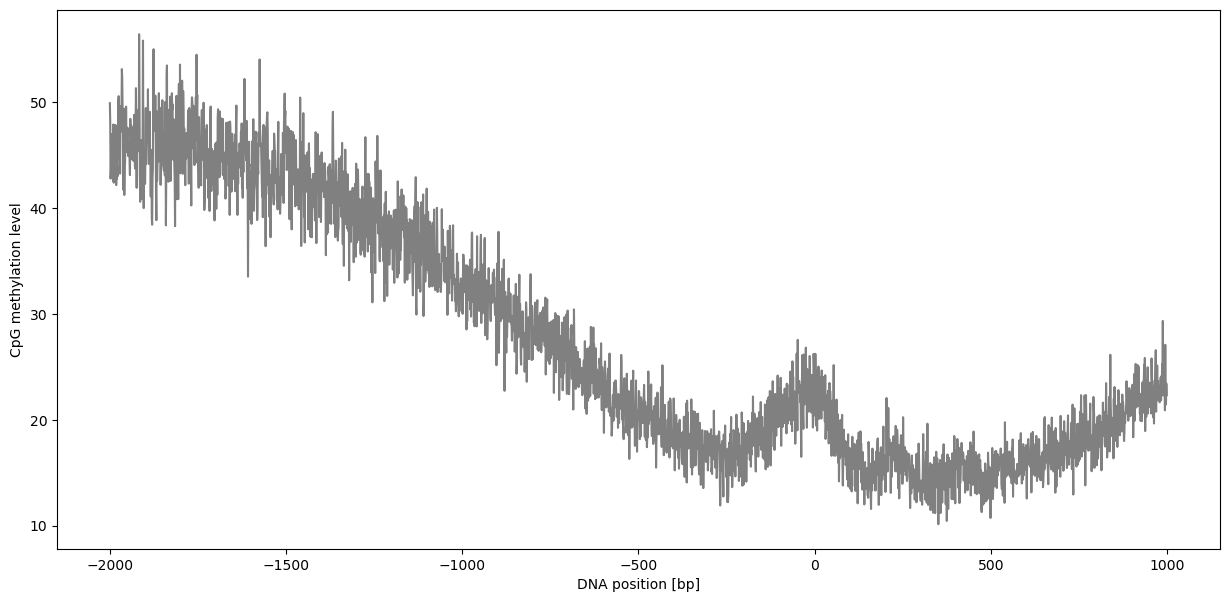

In [10]:
nome.plot_avg_methylation_levels(df_filtered, 'HCG')

In [11]:
df_random = df_filtered.copy()
df_random['meth_rate'] = df_random['meth_rate'].sample(frac=1).reset_index(drop=True)

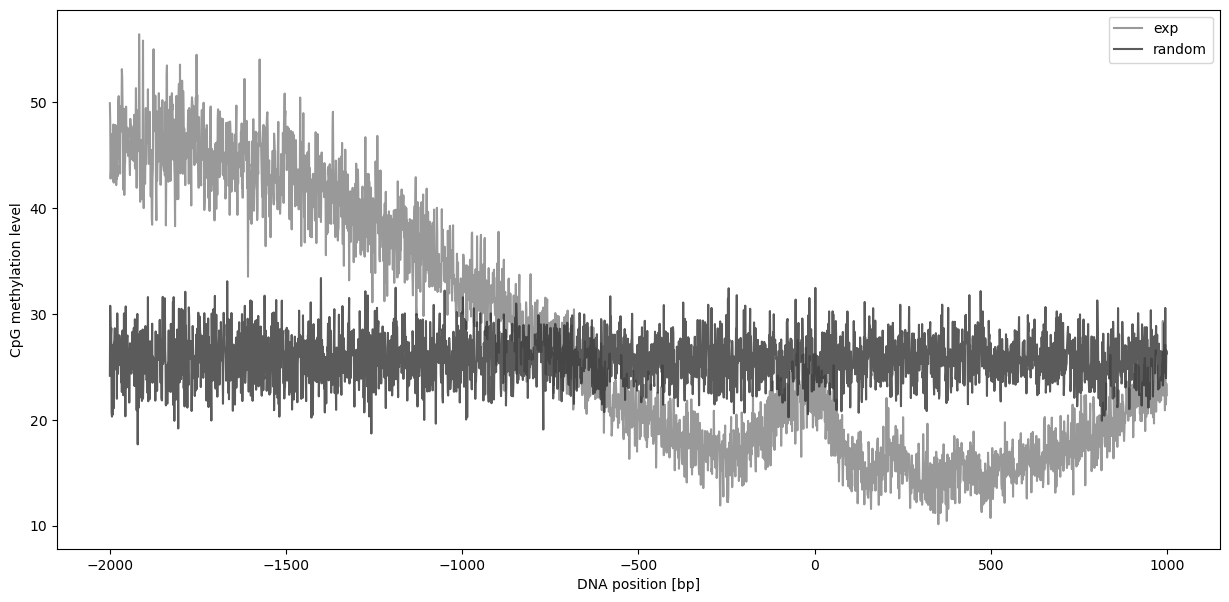

In [12]:
nome.plot_avg_methylation_levels(df_filtered, 'HCG', label='exp')
nome.plot_avg_methylation_levels(df_random, 'HCG', fig=False, c='#333232', label='random')

#### Convert GCH from Bis-SNP Format to nome format

In [ ]:
infile = data_path + 'cpg.raw.sort.GCH.bed'
outfile = data_path + 'GCH.raw.bed'
# nome.filter_bed_files(infile, outfile, min_cov=0)

In [ ]:
# print('no of reads in promoter region :', nome.get_num_reads(outfile))

#### Filtering by Chr and Saving in karlf/Bis-SNP format

If gnomeHMM works the convert everything to Bis_SNP format

In [ ]:
#bash gNOMeHMM_temp.sh -i ../DNA-Methylation-patterns/downstream/ -o out_withFDR.bed -t tmp/ -T

In [ ]:
infile = data_path + 'GCH.raw.bed'
res = nome.filter_by_chr(infile, chrs=['chr1'])

In [ ]:
len(res), res[0], res[-1]

In [ ]:
# outfile = data_path + 'GCH.raw.chr1.karlf.bed'
# with open(outfile, 'w') as fout:
#     fout.write('track name=KarlInp type=bedDetail' + '\n')
#     for line_s in res:
#         chrom = line_s[0].replace('chr','')
#         start = line_s[1]
#         end = line_s[2]
#         methyl_rate = line_s[4]
#         coverage = line_s[5]
#         strand = line_s[3]

#         fout.write('\t'.join([str(s) for s in [chrom, start, end, methyl_rate, coverage, strand]]) + '\n')

#### NDR peaks to NDR promoter intersection and distribution

In [ ]:
infile = data_path + 'GCH.peaks.raw.chr1.karlf.bed'
outfile = data_path + 'GCH.NDR.chr1.bed'
# nome.parse_peaks(infile, outfile, minq=0.1)

In [ ]:
infile = data_path + 'GCH.NDR.chr1.bed'
outfile = data_path + 'GCH.NDR.chr1.sorted.bed'
# nome.sort_bed(infile, outfile)

In [ ]:
promoters_sorted = data_path + 'refGene.promoters.sorted.bed'
infile = data_path + 'GCH.NDR.chr1.sorted.bed'
outfile = data_path + 'GCH.NDR.chr1.intersect.bed'

# nome.intersect_bed(promoters_sorted, infile, outfile)

In [ ]:
infile = data_path + 'GCH.NDR.chr1.intersect.bed'
df = nome.get_nuc_positions(infile)

In [ ]:
# df_filtered = df[df['strand'] == '+']
df_filtered = df

In [ ]:
inter_start = -2000
inter_end = 1000
step = 200
inter = range(inter_start,inter_end+1,step)

plt.figure()

plt.hist(df_filtered['nuc_end_promo_rel'],  bins = 60, histtype='bar', density=True, label="End positions", alpha = 0.8)  
plt.hist(df_filtered['nuc_start_promo_rel'], bins = 60, histtype='bar', density=True, label="Start positions", alpha = 0.5)   

plt.xlabel("DNA position [bp]")
plt.ylabel("Density")

plt.xlim(-2000,1000)
plt.axvline(x=0, linestyle='dashed', linewidth=2, color='grey')
plt.legend()
plt.show()